<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследуем-суммарную-концентрацию-металлов-на-разных-стадиях:-в-сырье,-в-черновом-концентрате,-в-концентрате-после-первой-очистки-и-в-финальном-концентрате." data-toc-modified-id="Исследуем-суммарную-концентрацию-металлов-на-разных-стадиях:-в-сырье,-в-черновом-концентрате,-в-концентрате-после-первой-очистки-и-в-финальном-концентрате.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследуем суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.</a></span></li></ul></li><li><span><a href="#Подготовка-к-обучению" data-toc-modified-id="Подготовка-к-обучению-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к обучению</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Итоговые-выводы" data-toc-modified-id="Итоговые-выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговые выводы</a></span></li></ul></div>

# Восстановление золота из руды

Подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.



**Описание данных**
* Технологический процесс
> Rougher feed — исходное сырье  
Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant  
Xanthate — ксантогенат (промотер, или активатор флотации);  
Sulphate — сульфат (на данном производстве сульфид натрия);  
Depressant — депрессант (силикат натрия).  
Rougher process (англ. «грубый процесс») — флотация  
Rougher tails — отвальные хвосты  
Float banks — флотационная установка  
Cleaner process — очистка  
Rougher Au — черновой концентрат золота  
Final Au — финальный концентрат золота  
* Параметры этапов
> air amount — объём воздуха  
fluid levels — уровень жидкости  
feed size — размер гранул сырья  
feed rate — скорость подачи  

## Подготовка данных

In [62]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np
state = np.random.RandomState(123)

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor

from tqdm.notebook import tqdm

In [60]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [2]:
df_train = pd.read_csv('/datasets/gold_industry_train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [4]:
df_train = df_train.fillna(method='ffill')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14579 non-null  float64
 4   rougher.input.feed_sol                              14579 non-null  float64
 5   rougher.input.feed_rate                             14579 non-null  float64
 6   rougher.input.feed_size                             14579 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14579 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14579 non-null  float64


In [6]:
df_train.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [7]:
c = df_train['rougher.output.concentrate_au']
f = df_train['rougher.input.feed_au']
t = df_train['rougher.output.tail_au']

recovery = (c*(f-t))/(f*(c-t))*100

In [8]:
MAE = mean_absolute_error(recovery, df_train['rougher.output.recovery'])
MAE

9.83758577644259e-15

Ошибка очень маленькая, значит в данных эффективность посчитана верно

In [9]:
df_test = pd.read_csv('/datasets/gold_industry_test.csv')

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [11]:
df_test = df_test.fillna(method='ffill')

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4860 non-null   float64
 4   rougher.input.feed_sol                      4860 non-null   float64
 5   rougher.input.feed_rate                     4860 non-null   float64
 6   rougher.input.feed_size                     4860 non-null   float64
 7   rougher.input.floatbank10_sulfate           4860 non-null   float64
 8   rougher.input.floatbank10_xanthate          4860 non-null   float64
 9   rougher.state.floatbank10_a_air             4860 non-null   float64
 10  rougher.stat

In [13]:
df_test.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,1047.279065,-500.354091,948.756608,-498.439416,849.441918,-499.255503,850.112246,-499.407112,6.168939,9.309852,95.248427,8.078957,6.500000,1.283045,1648.759906,-399.862053,1650.135395,-399.957321,1648.831890,-400.586116,1649.464582,-400.673303,34.940919,-500.150510,30.031867,-500.328335,26.033990,-500.147792,22.952306,-500.037678,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,1054.009756,-500.237335,944.138793,-496.866953,851.589767,-499.040466,851.345606,-499.122561,6.209517,9.297194,98.880538,7.984164,6.500000,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,1651.498591,-399.745329,34.980742,-498.131002,29.968453,-586.013330,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,1150.754676,-499.986009,1049.182824,-500.014696,948.085464,-499.997003,850.170086,-500.270334,849.557905,-500.198702,7.358308,9.000624,119.497545,8.003752,6.500000,1.259741,1647.368779,-399.788506,1648.395206,-400.166490,1648.953828,-400.468641,1649.821569,-400.071884,34.952967,-501.204647,29.927025,-500.106628,25.978253,-499.890060,23.004376,-500.014529,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,1152.512559,-500.338106,1052.601592,-499.695075,955.171539,-500.294989,851.957342,-499.779541,850.765662,-501.030559,6.929364,8.920717,108.080163,7.970121,6.660000,0.774909,1652.660845,-399.702218,1651.203128,-400.291472,1651.924848,

In [14]:
set(df_train.columns) - set(df_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке отсутствуют данные по "выходу", т.е. output.  
Также, хронологически тестовая выборка почему-то позднее чем учебная.

In [15]:
df = pd.read_csv('/datasets/gold_industry_full.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


In [17]:
df = df.fillna(method='ffill')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19439 non-null  float64
 4   rougher.input.feed_sol                              19439 non-null  float64
 5   rougher.input.feed_rate                             19439 non-null  float64
 6   rougher.input.feed_size                             19439 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19439 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19439 non-null  float64


In [19]:
df.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [20]:
df.agg(['mean','median', 'std', 'min', 'max'])

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
min,2016-01-15 00:00:00,0.010000,0.010000,0.010000,0.010000,0.002986,0.046369,0.001083,0.000568,-0.042069,-657.949759,-0.721806,-650.260008,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.443911,-2.593390,-649.949283,0.000077,0.000290,-4.223520e+07,-486.598675,-264.982785,-0.010548,0.000000,0.000000,0.000000,0.000000,0.000000,0.020676,0.594562,0.007566,10.014648,0.003112,0.000000,1.080000,0.000005,5.445860e-32,-798.641662,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.077503,-799.606441,0.000000,-799.873878,0.000000,-799.755798,0.000000,-809.333008,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2018-08-18 10:59:59,13.731330,14.596026,7.142594,53.477742,717.508837,484.967466,36.118275,9.703448,1521.980372,-273.776101,1809.194008,-296.383080,2499.129174,-292.155509,1817

Чтобы не рисовать много графиков, придумал такую функцию для отделения столбцов с подозрительной разницей между медианой и средним, чтобы попытаться отловить аномальные значения

rougher.state.floatbank10_a_air
rougher.state.floatbank10_a_level
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
primary_cleaner.input.depressant
secondary_cleaner.state.floatbank4_b_level


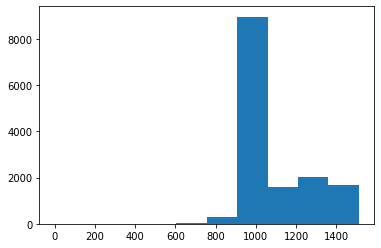

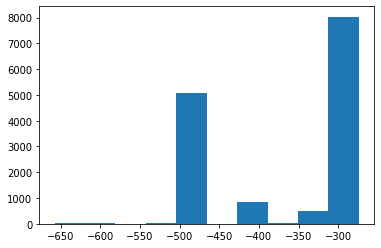

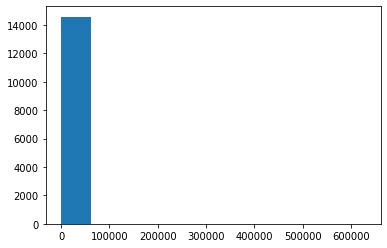

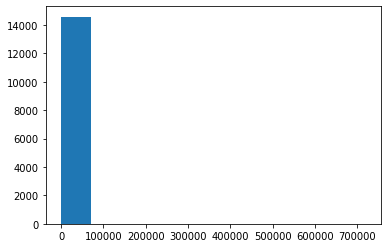

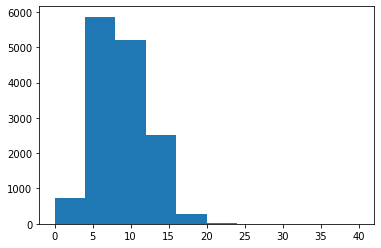

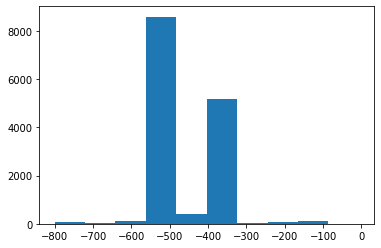

In [21]:
for column in df_train.columns[1:] :
    if abs(df_train[column].mean() - df_train[column].median()) > abs(df_train[column].mean()/12.5):
        print(column)
        fig, axs = plt.subplots() 
        plt.hist(df_train[column], label=column)
        plt.show


In [22]:
df_train = df_train.loc[(df_train['rougher.calculation.floatbank10_sulfate_to_au_feed']<100000) &
                        (df_train['rougher.calculation.floatbank11_sulfate_to_au_feed']<100000)]

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14577 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14577 non-null  object 
 1   rougher.input.feed_au                               14577 non-null  float64
 2   rougher.input.feed_ag                               14577 non-null  float64
 3   rougher.input.feed_pb                               14577 non-null  float64
 4   rougher.input.feed_sol                              14577 non-null  float64
 5   rougher.input.feed_rate                             14577 non-null  float64
 6   rougher.input.feed_size                             14577 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14577 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14577 non-null  float64


In [24]:
df.duplicated().sum()

0

Убрали 2 подозрительных значения. Можно делить на признаки, а потом и на выборки.

## Анализ данных

In [25]:
concentration_list = ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb',
                      'rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 
                     'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb',
                     'final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']
au_conc = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 
           'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']
ag_conc = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 
           'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']
pb_conc = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 
           'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']

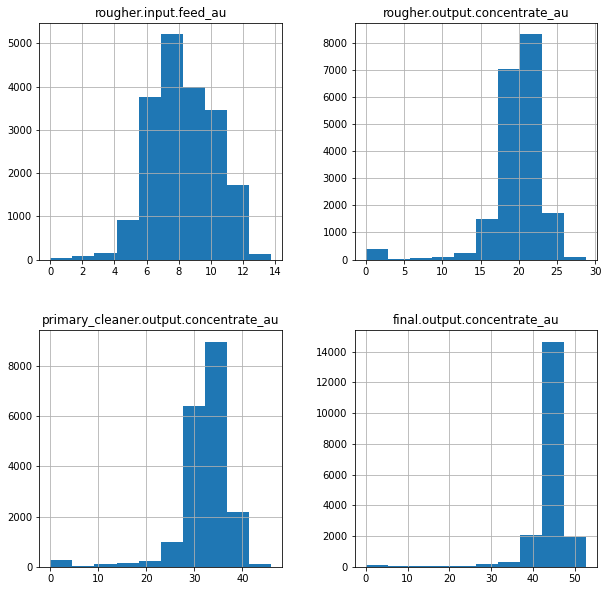

In [26]:
df[au_conc].hist(figsize=(10,10))
plt.show()

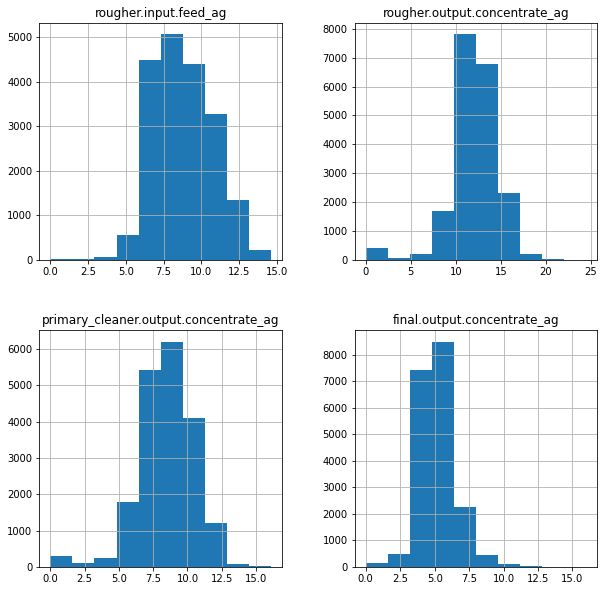

In [27]:
df[ag_conc].hist(figsize=(10,10))
plt.show()

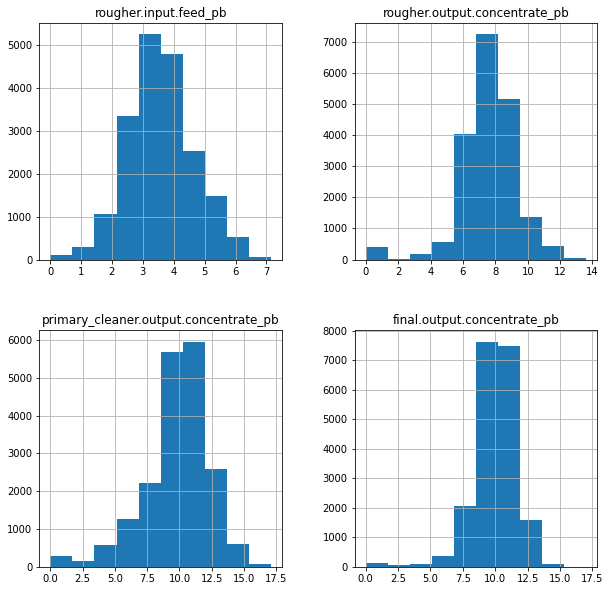

In [28]:
df[pb_conc].hist(figsize=(10,10))
plt.show()

В процессе намывания золота концентрация его в руде должна расти, так и происходит на первых 4 графиках.  
На вторых рассмотрели серебро - его концентрация сначала немного увеличилась (возможно за счет того, что другие примеси вымываются более активно, процентное соотношение серебра немного подросло), а затем и серебро так же вымывается из смеси.  
А вот со свинцом ситуация сложнее - он скорее накапливается с руде. Могу лишь предположить, что такая особенность связана с его химическими свойствами, возможно схожими с золотом.

<AxesSubplot:>

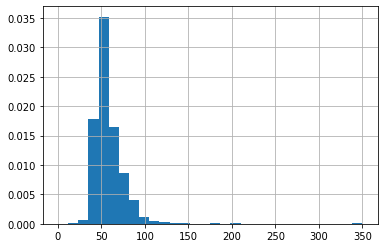

In [29]:
df_train['rougher.input.feed_size'].hist(density=True, bins=30, range=(0,350))

<AxesSubplot:>

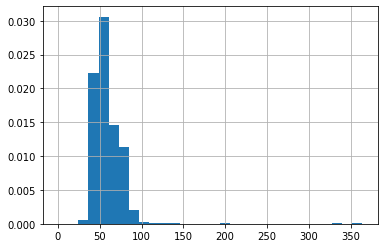

In [30]:
df_test['rougher.input.feed_size'].hist(density=True, bins=30)

Распределения выглядят аналогично, значит размеры гранул в выборки попали равномерно  

### Исследуем суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.


In [31]:
df_train.columns

Index(['date', 'rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_sol',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate

In [32]:
df_train.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

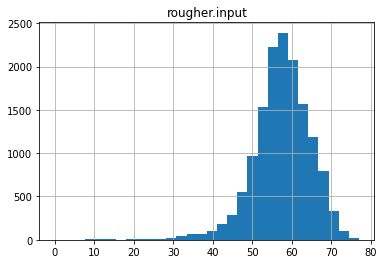

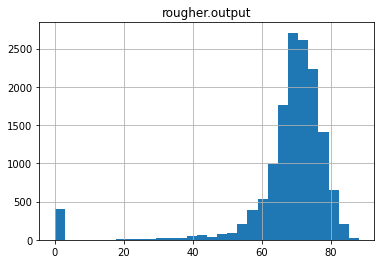

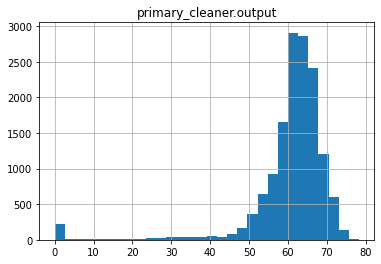

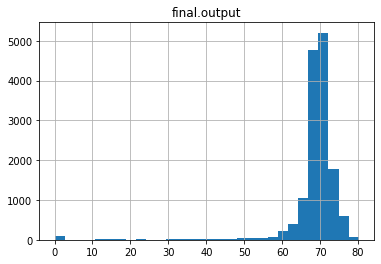

In [35]:
metal_list = [['rougher.input.feed_au', 'rougher.input.feed_ag', 
               'rougher.input.feed_pb', 'rougher.input.feed_sol'],
             ['rougher.output.concentrate_au',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
       'rougher.output.concentrate_sol'],
             ['primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol'],
             ['final.output.concentrate_au', 'final.output.concentrate_ag',
       'final.output.concentrate_pb', 'final.output.concentrate_sol']]

titles = ['rougher.input', 'rougher.output', 'primary_cleaner.output', 'final.output']

for metals, title in zip(metal_list, titles):
    fig, axs = plt.subplots()
    plt.title(title)
    df_train[metals].agg('sum', axis=1).hist(bins=30)

Интересный столбик в районе нуля - он говорит нам, что в некоторых партиях после определенных этапов мы якобы получаем на выходе полное или почти полное отсутствие каких-либо металлов. Которые тем не менее потом появляются в той же партии.  
Скорее всего ошибка ввода данных. Посчитаем сколько таких ошибок

In [37]:
titles = ['rougher.input.metal', 'rougher.output.metal', 'primary_cleaner.output.metal', 'final.output.metal']

for name, metals in zip(titles, metal_list): 
    df_train[name] = df_train[metals].agg('sum', axis=1)

for name in titles:
    display(df_train[df_train[name] < 10][titles].head())
    print('-----------'*5)

,rougher.input.metal,rougher.output.metal,primary_cleaner.output.metal,final.output.metal
984,8.219283,0.000000,1.652472,4.759584
1482,8.429133,2.016647,1.278167,12.791077
3668,4.501868,0.000000,0.000000,0.000000
9278,9.468028,0.000000,22.019680,17.067616
10645,8.072476,18.856160,9.390157,5.945843


-------------------------------------------------------


,rougher.input.metal,rougher.output.metal,primary_cleaner.output.metal,final.output.metal
36,58.602038,0.0,74.992510,66.175996
37,59.921613,0.0,75.187102,66.794250
38,57.269041,0.0,75.513787,67.572604
39,25.352358,0.0,75.491415,65.598903
40,40.721375,0.0,71.837866,63.445359


-------------------------------------------------------


,rougher.input.metal,rougher.output.metal,primary_cleaner.output.metal,final.output.metal
14,56.005644,62.930764,0.000000,64.546766
16,57.481679,63.039013,7.488378,64.941935
17,56.038252,62.225893,0.000000,64.554911
25,57.764677,62.283147,0.000000,63.765751
58,56.626743,61.183102,0.000000,65.773298


-------------------------------------------------------


,rougher.input.metal,rougher.output.metal,primary_cleaner.output.metal,final.output.metal
516,46.703740,56.574778,53.725613,0.0
943,53.368945,61.681632,61.254172,0.0
944,51.963364,60.214950,60.410868,0.0
945,48.892687,58.592426,60.154484,0.0
946,49.265736,58.363177,59.909714,0.0


-------------------------------------------------------


In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14577 entries, 0 to 14578
Data columns (total 91 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14577 non-null  object 
 1   rougher.input.feed_au                               14577 non-null  float64
 2   rougher.input.feed_ag                               14577 non-null  float64
 3   rougher.input.feed_pb                               14577 non-null  float64
 4   rougher.input.feed_sol                              14577 non-null  float64
 5   rougher.input.feed_rate                             14577 non-null  float64
 6   rougher.input.feed_size                             14577 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14577 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14577 non-null  float64


In [39]:
for name in titles:
    df_train[name] = df_train[df_train[name] > 10][name]

In [40]:
df_train = df_train.dropna()

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13849 entries, 0 to 14578
Data columns (total 95 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                13849 non-null  object 
 1   rougher.input.feed_au                               13849 non-null  float64
 2   rougher.input.feed_ag                               13849 non-null  float64
 3   rougher.input.feed_pb                               13849 non-null  float64
 4   rougher.input.feed_sol                              13849 non-null  float64
 5   rougher.input.feed_rate                             13849 non-null  float64
 6   rougher.input.feed_size                             13849 non-null  float64
 7   rougher.input.floatbank10_sulfate                   13849 non-null  float64
 8   rougher.input.floatbank10_xanthate                  13849 non-null  float64


## Подготовка к обучению

In [42]:
features_train = df_train[df_test.columns].drop('date', axis=1)
target_train = df_train[['rougher.output.recovery', 'final.output.recovery']]

In [43]:
features_test = df_test.drop('date', axis=1)
target_test = df_test.set_index('date').join(df.set_index('date'), how='left', rsuffix='_')\
[['rougher.output.recovery', 'final.output.recovery']]

In [44]:
target_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4860 entries, 2017-12-09 14:59:59 to 2018-08-18 10:59:59
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rougher.output.recovery  4860 non-null   float64
 1   final.output.recovery    4860 non-null   float64
dtypes: float64(2)
memory usage: 242.9+ KB


In [45]:
features_train.shape, target_train.shape, features_test.shape, target_test.shape

((13849, 52), (13849, 2), (4860, 52), (4860, 2))

In [46]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train_scaled = scaler.transform(features_train)
features_test_scaled = scaler.transform(features_test)

## Модель

In [47]:
def smape( target , prediction ):
    smape_score = 1/ len (target) * np.sum (2 * np.abs(prediction-target) / (np.abs (target) + np.abs (prediction))*100)
    score = 0.25*smape_score[0] + 0.75*smape_score[1]
    return score

Идеальный показатель для нас - 0

In [49]:
smape_scorer = make_scorer(smape, greater_is_better = 1)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


In [69]:
%%time
best_model_DT = None
best_score_DT = 100
smape_score = None
for depth in tqdm(range(1,25)):
    model = DecisionTreeRegressor(max_depth=depth, random_state=state)
    score = cross_val_score(model, features_train_scaled, target_train, scoring = smape_scorer, cv=5).mean()    
    if score < best_score_DT:
        best_score_DT = score
        best_model_DT = model

  0%|          | 0/24 [00:00<?, ?it/s]

CPU times: user 1min 36s, sys: 180 ms, total: 1min 37s
Wall time: 1min 38s


In [70]:
best_score_DT, best_model_DT

(8.741141014909957,
 DecisionTreeRegressor(max_depth=1,
                       random_state=RandomState(MT19937) at 0x7FE65FEBEA40))

Перебор параметров идет довольно долго, выбрал по нему параметры

In [81]:
%%time
best_model_RF = None
best_score_RF = 100
smape_score = None

for depth in tqdm(range(1,5,1)):
    for num in range(50,251,50):
        model = RandomForestRegressor(max_depth=depth, random_state=state, n_estimators=num)
        score = cross_val_score(model, features_train_scaled, target_train, scoring = smape_scorer, cv=5).mean()    
        if score < best_score_RF:
            best_score_RF = score
            best_model_RF = model

  0%|          | 0/8 [00:00<?, ?it/s]

CPU times: user 22min 6s, sys: 1.96 s, total: 22min 8s
Wall time: 22min 9s


In [72]:
best_score_RF, best_model_RF

(8.455173608021955,
 RandomForestRegressor(max_depth=3, n_estimators=50,
                       random_state=RandomState(MT19937) at 0x7FE65FEBEA40))

Получили ошибку около 8.45

In [83]:
model_LR = LinearRegression()
score_LR = cross_val_score(model_LR, features_train, target_train, scoring = smape_scorer, cv=5).mean()

In [84]:
score_LR, model_LR

(8.872101220885325, LinearRegression())

Остановимся на модели RandomForestRegressor

In [86]:
best_model_RF.fit(features_train_scaled, target_train)
prediction = best_model_RF.predict(features_test_scaled)
score_test = smape(target_test, prediction)
score_test

5.4384473280713355

In [87]:
dummy_model = DummyRegressor()
score_dummy = cross_val_score(best_model_RF, features_train, target_train, scoring = smape_scorer, cv=5).mean()
score_dummy

9.413882947561463

Модель прошла проверку на адекватность
Показатель на тестовых данных score_test

## Итоговые выводы

В ходе исследования мы очистили сделали следующее:  
* очистили данные от аномалий, масштабировали их
* посмотрели, как меняется содержание маталлов в руде на разных этапах производства
* проследили, чтобы размер гранул совпадал в выборках для обучении
* подготовили несколько моделей и выбрали для них наилучшие параметры 

**Лучшая модель - RandomForestRegressor(max_depth=3, n_estimators=50,
                       random_state=RandomState(MT19937) at 0x7F88DC70B540))
Симметричное среднее абсолютное процентное отклонение около 5,44**                     